In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sqlite3

#import udf:s :
from udf.eda import pie_chart,price_change_plot,plot_prices
from udf.model import try_model,resample_data



dbpath="db/flight_prices.db"


conn = sqlite3.connect(dbpath)


model_data=pd.read_sql_query("SELECT * from model_data", conn)
model_data_all=pd.read_sql_query("SELECT * from model_data", conn)

conn.close()

**<p style="text-align: center;">Inbalanced data with no price change beeing the most frequent</p>**

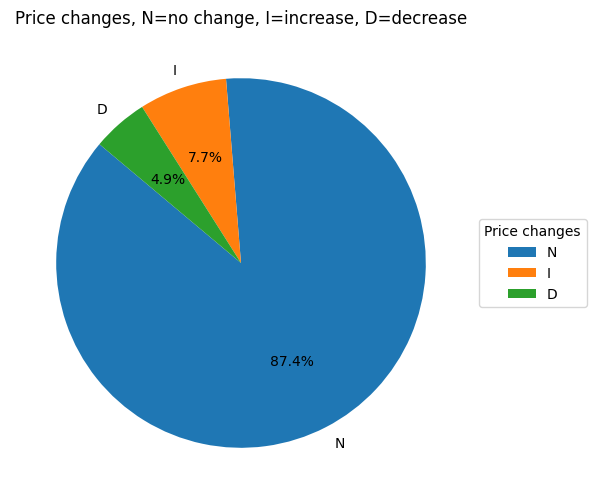

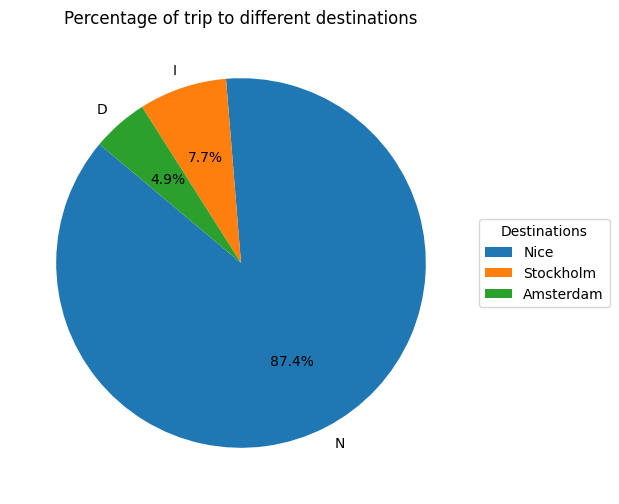

In [4]:
pie_chart(model_data_all)


    If Sum of price changes>0 more increase of prices than decrease, if Sum of price changes<0 more decrease of prices than increase

**<p style="text-align: center;">Amsterdam</p>**

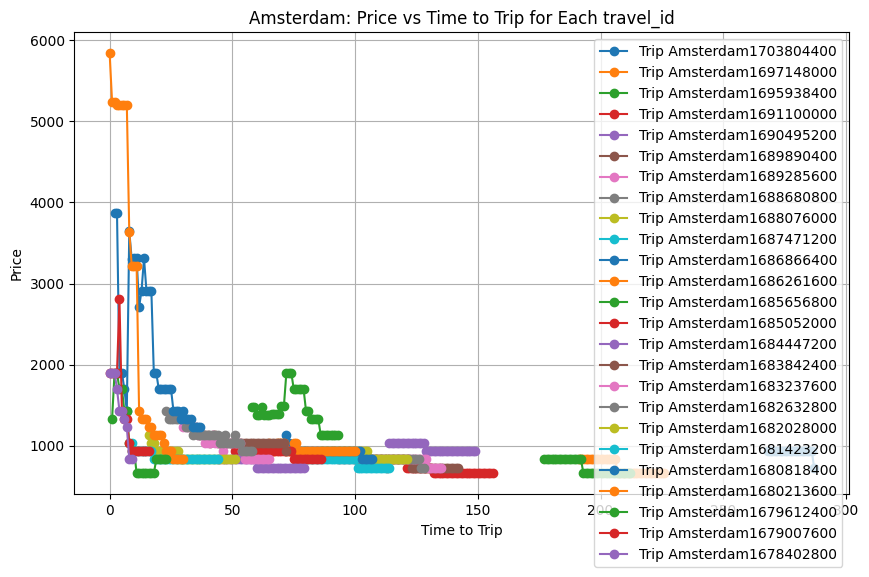

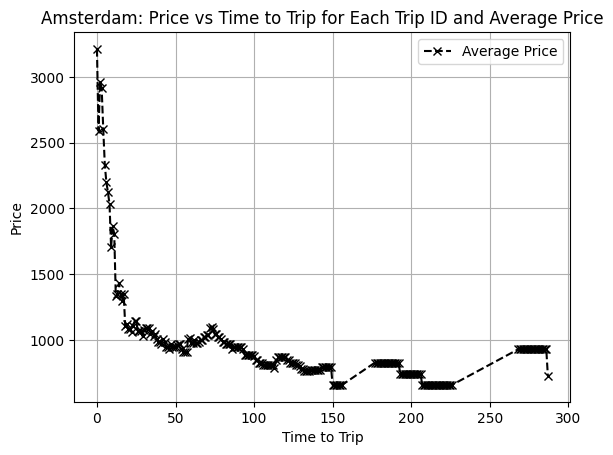

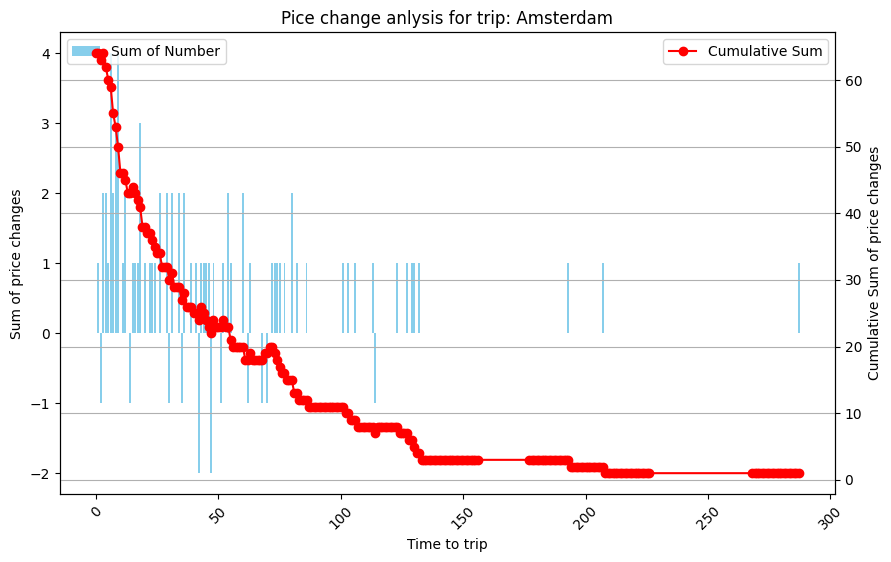

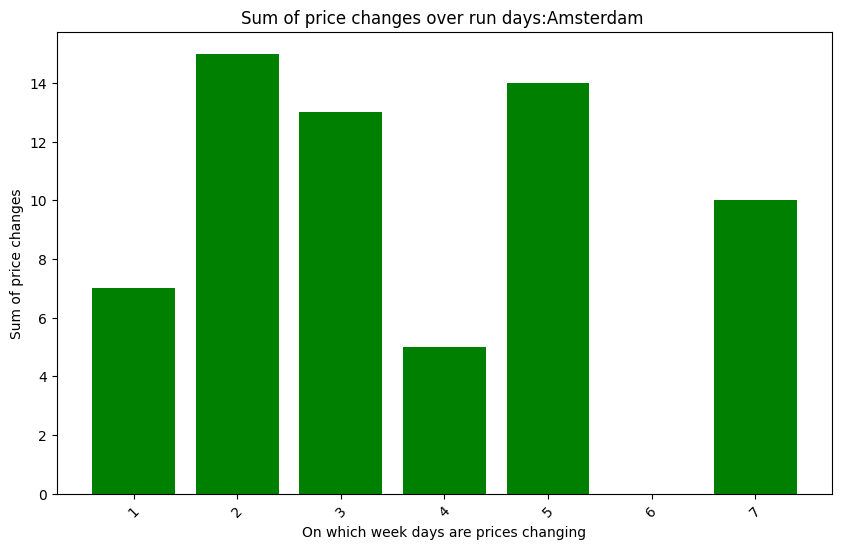

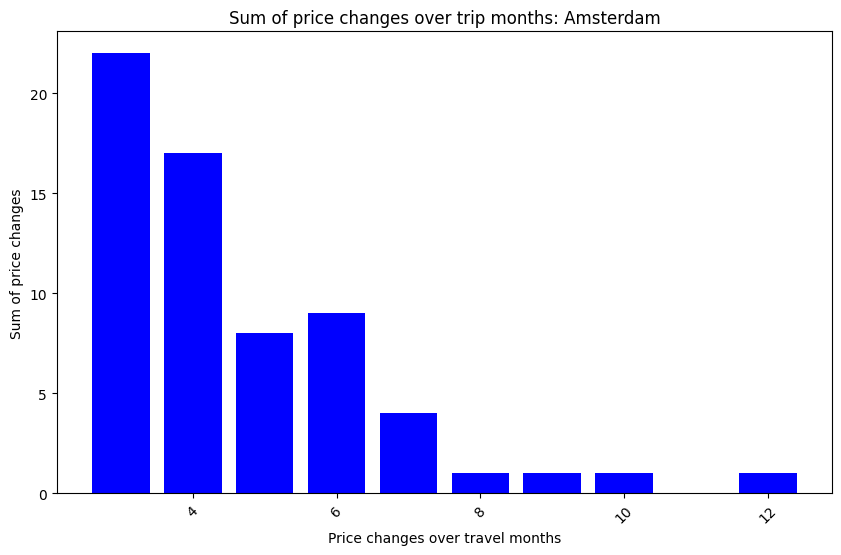

In [5]:
plot_prices(model_data_all,'Amsterdam')
price_change_plot(model_data_all,'Amsterdam',400)

**<p style="text-align: center;">Nice</p>**

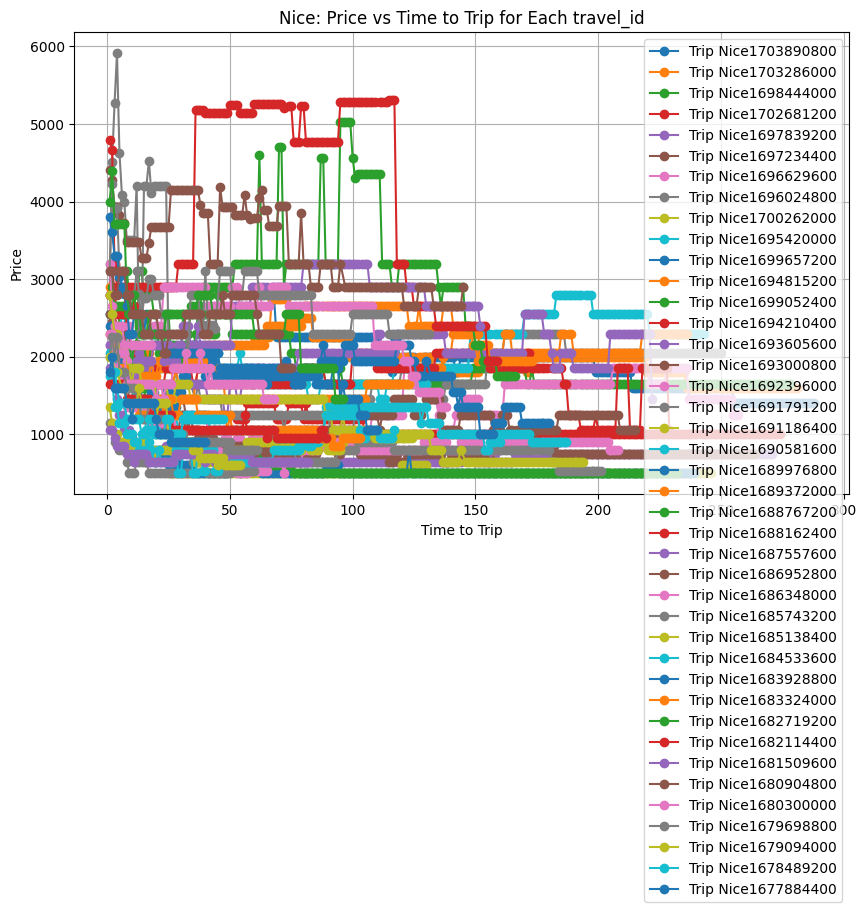

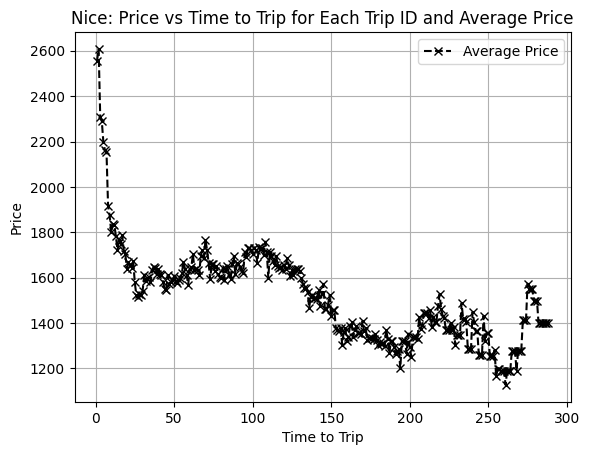

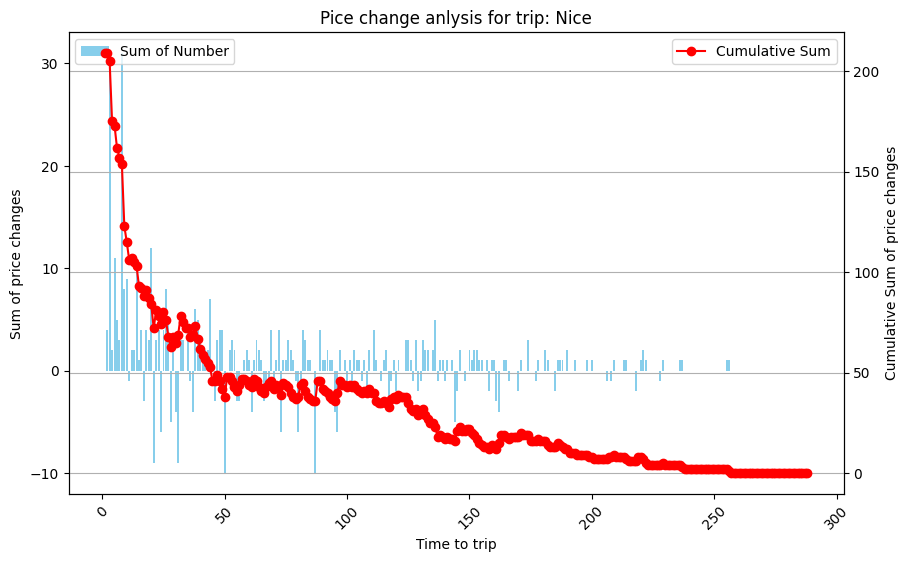

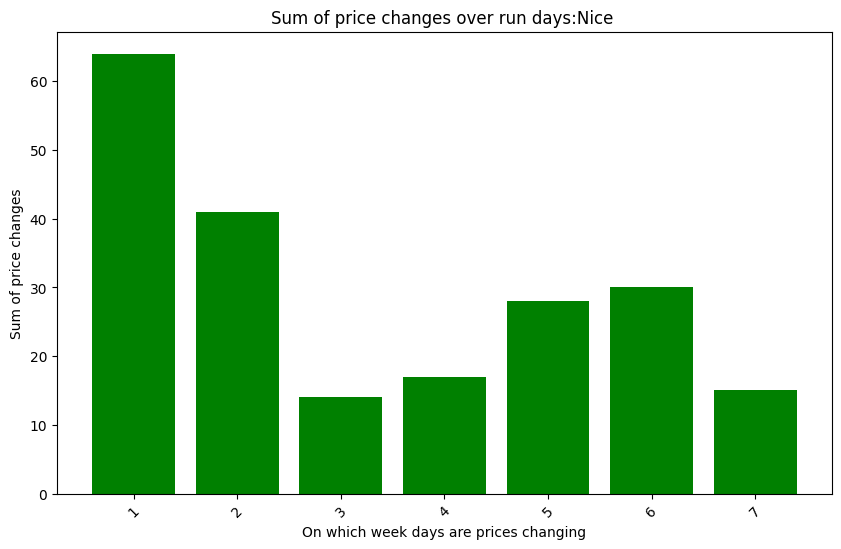

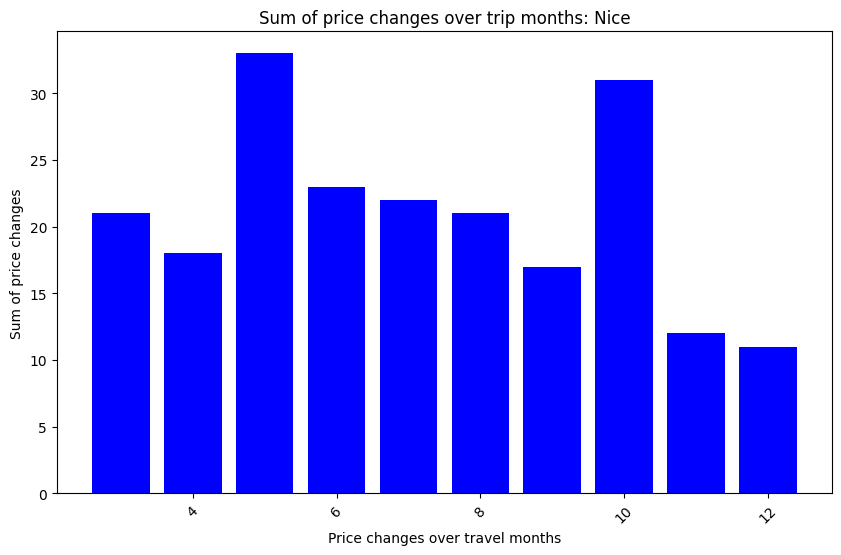

In [6]:
plot_prices(model_data_all,'Nice')
price_change_plot(model_data_all,'Nice',400)

**<p style="text-align: center;">Stockholm</p>**

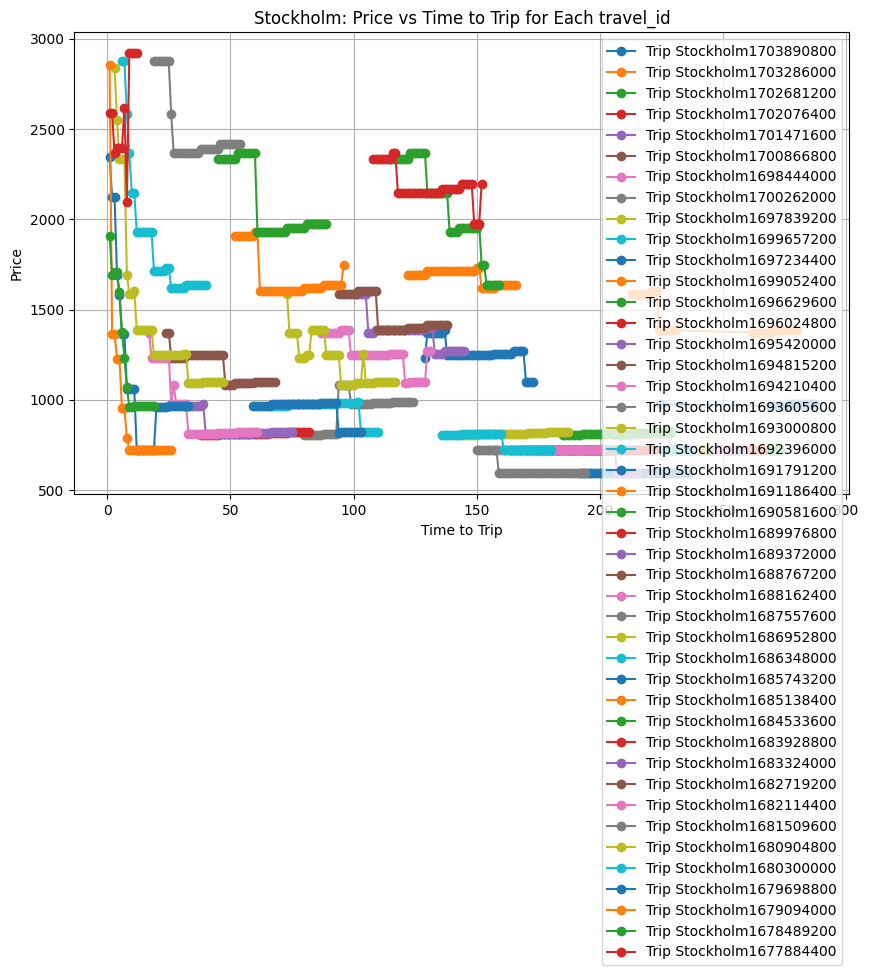

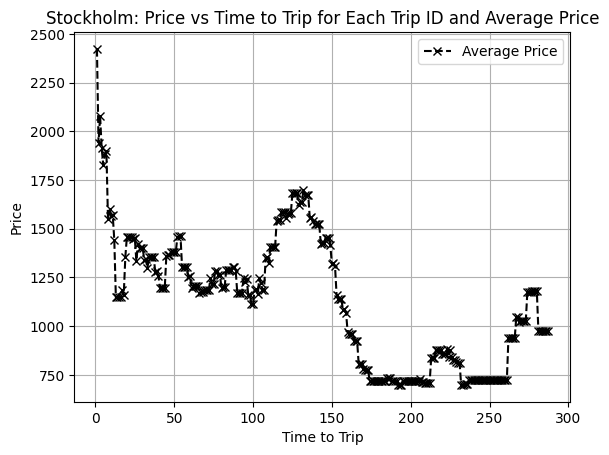

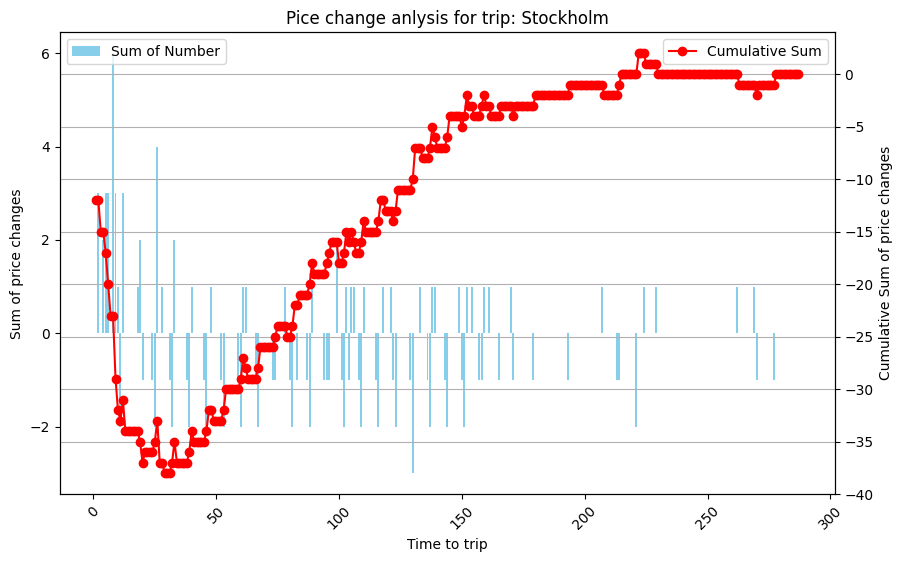

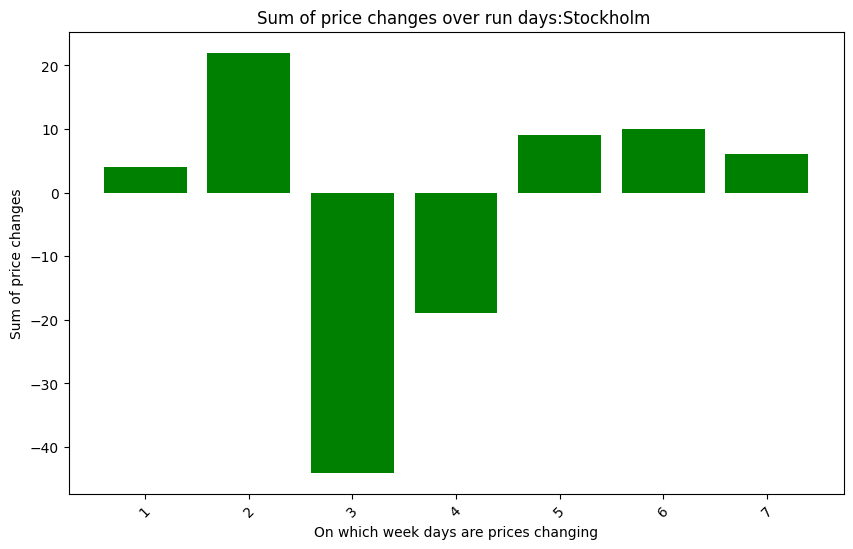

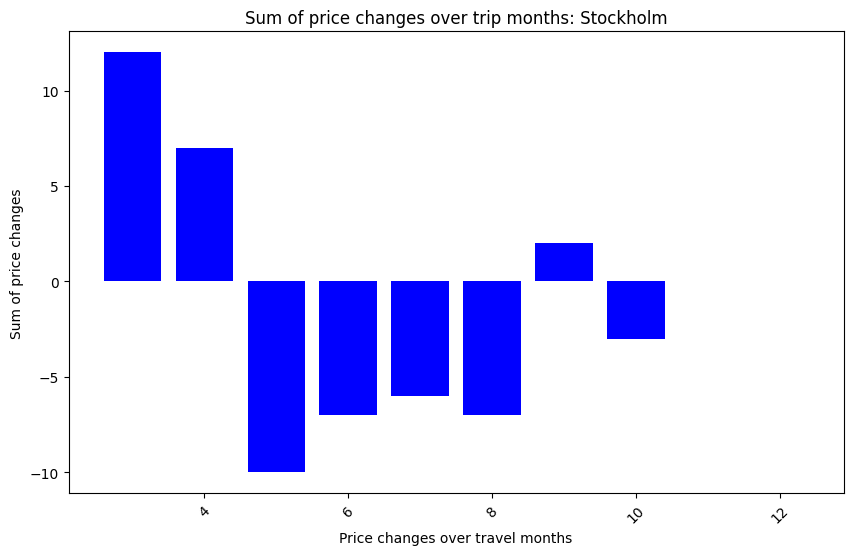

In [7]:
plot_prices(model_data_all,'Stockholm')
price_change_plot(model_data_all,'Stockholm',400)

**Since destination==Stockholm has a different price pattern from the rest of the destinations, it was excluded from the modeldata:**

In [8]:

modeldata_nostockholm=model_data.query("destination!='Stockholm'")

y=modeldata_nostockholm[['change_status']]
X=modeldata_nostockholm[['time_to_trip','weekend','run_date_day_number','trip_date_month_number','price','price_level','to_nice','to_amsterdam']]


modeldata_train = modeldata_nostockholm[['change_status','time_to_trip','weekend','run_date_day_number','trip_date_month_number','price','price_level','to_nice','to_amsterdam']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build on inital most frequent class
dummy_model = DummyClassifier(strategy="most_frequent").fit(X_train, y_train.values.ravel())


**<p style="text-align: center;">Model with no iteractions and trained on inbalanced data</p>**

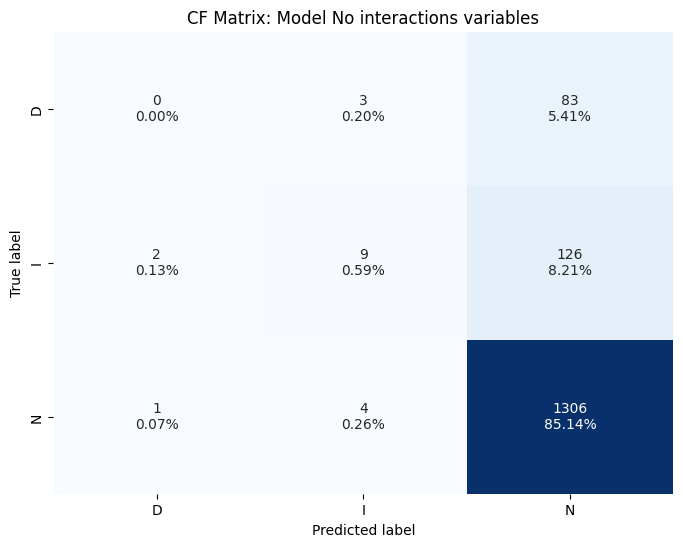

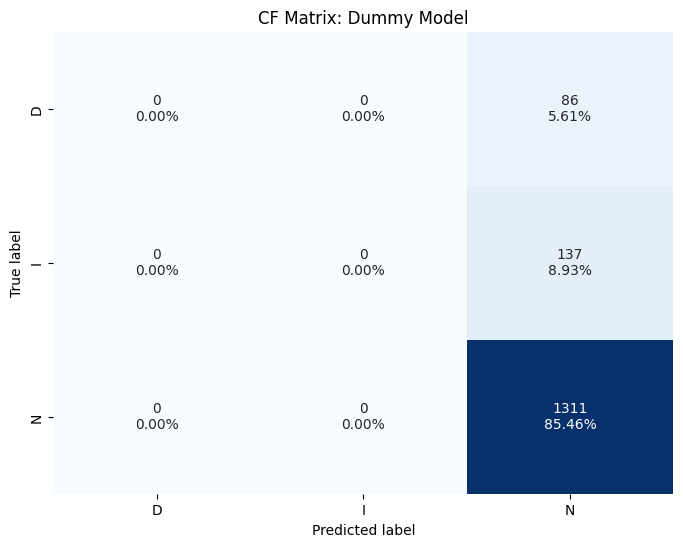

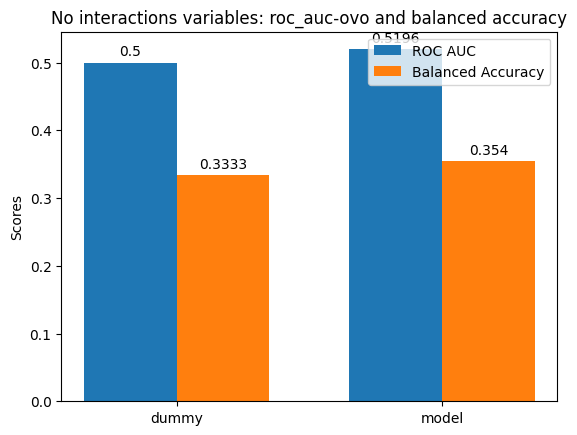

In [12]:

try_model(X_train, X_test, y_train, y_test,'N',GradientBoostingClassifier(random_state=0),dummy_model,'No interactions variables')


**<p style="text-align: center;">Model with iteractions variables included and trained on balanced data</p>**

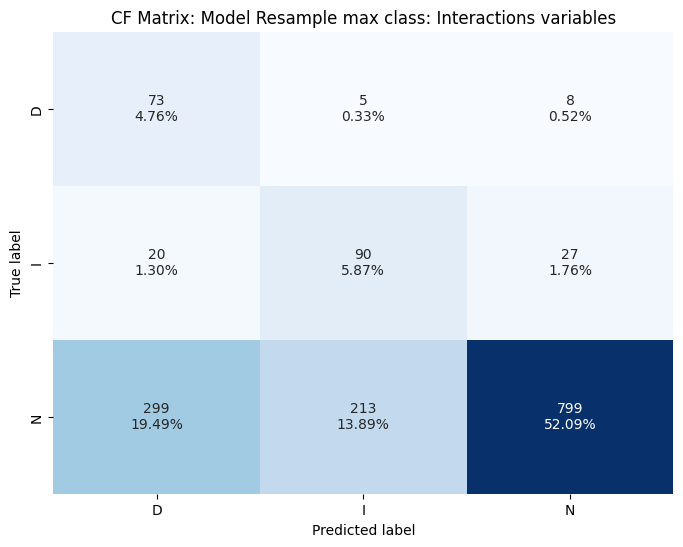

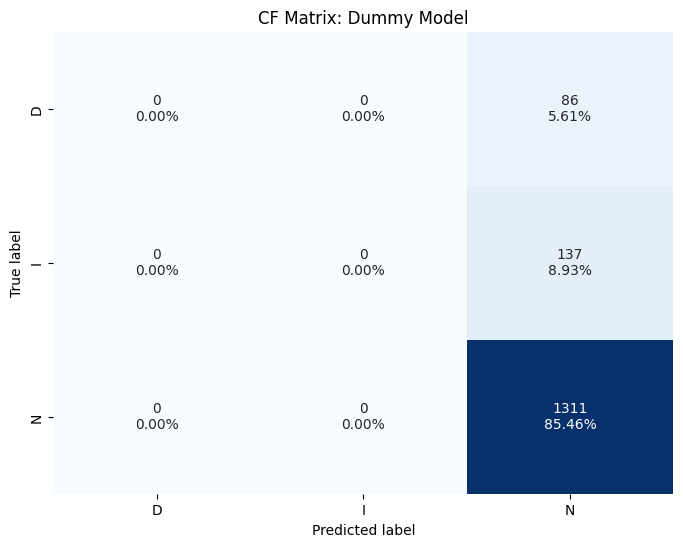

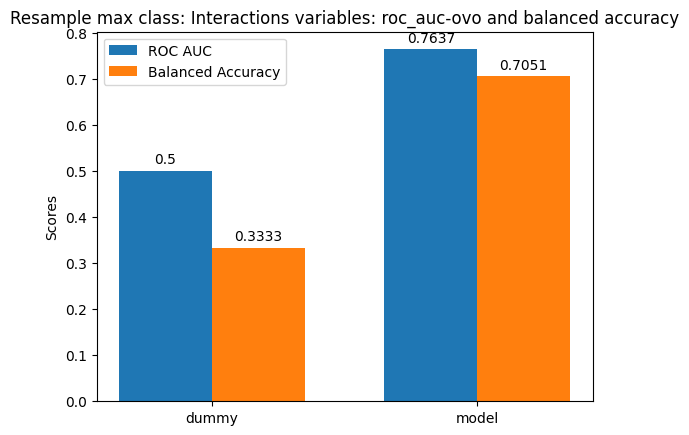

In [11]:
X_train_least,y_train_least,X_train_most,y_train_most=resample_data(modeldata_train)

try_model(X_train_most, X_test, y_train_most, y_test,'Y',GradientBoostingClassifier(random_state=0),dummy_model,'Resample max class: Interactions variables')

Working with balanced data and including iteractions variables increased the model roc to more acceptable levels.